In [48]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [49]:
whale_returns_csv = Path("C:/Users/solse/Homework 2/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_returns_csv = Path("C:/Users/solse/Homework 2/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col= "Date", infer_datetime_format=True, parse_dates=True)

sp500_history_csv = Path("C:/Users/solse/Homework 2/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [50]:
whale_returns_clean = whale_returns.dropna()

In [51]:
whale_returns_clean.drop_duplicates()
whale_returns_clean.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [52]:
#finding nulls 
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [53]:
#clean nulls
whale_returns_clean = whale_returns.dropna()
whale_returns_clean.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [54]:
algo_returns_clean = algo_returns.dropna()
algo_returns_clean.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

In [55]:
algo_returns.dropna(inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [56]:
sp500_history_csv = Path("C:/Users/solse/Homework 2/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(ascending = True, inplace = True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [57]:
sp500_history.dtypes

Close    object
dtype: object

In [58]:
sp500_history["Close"]= sp500_history["Close"].str.replace('$','', regex=True).astype("float")
sp500_history.sort_index(inplace = True)
sp500_history

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [59]:
sp500_daily_returns = sp500_history.pct_change()

In [60]:
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [61]:
sp500_daily_returns.rename(columns = {"Close":"sp500"}, inplace = True)

In [62]:
df_daily = pd.concat([whale_returns, algo_returns,sp500_daily_returns], axis = "columns",join = "inner")

<AxesSubplot:xlabel='Date'>

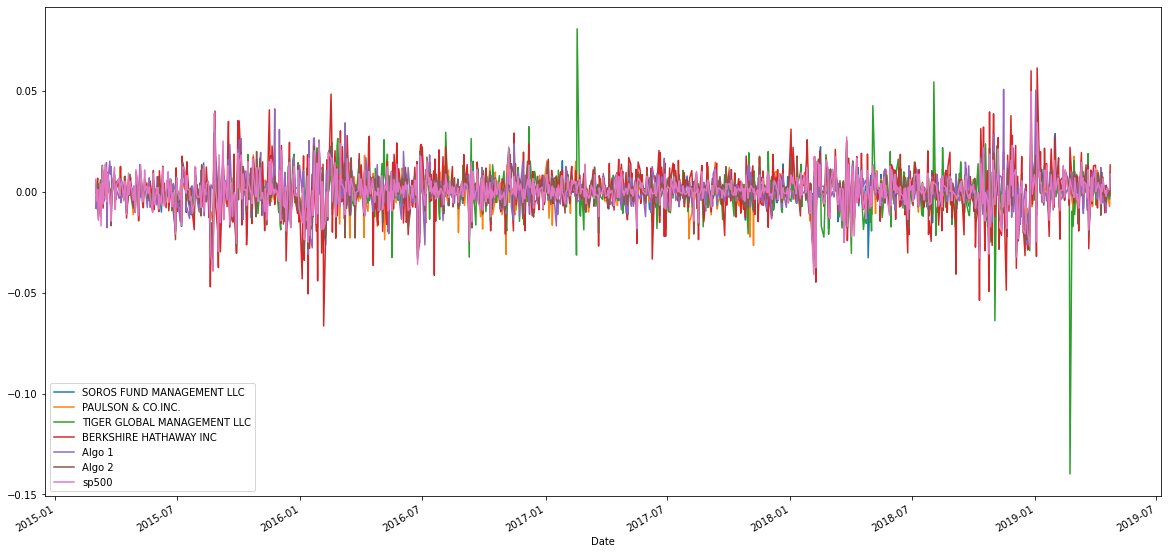

In [63]:
df_daily.plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

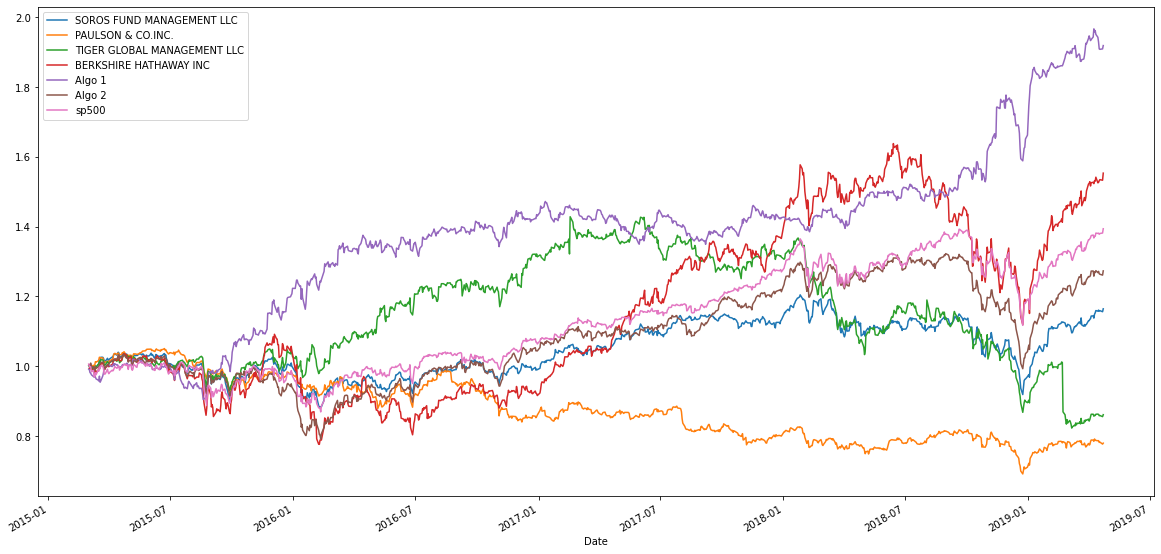

In [66]:

#plot
df_cum = (1+ df_daily).cumprod()
df_cum.plot(figsize = (20,10))

In [69]:
sharpe_ratios = df_daily.mean()*252/(df_daily.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.360829
Algo 2                         0.506929
sp500                          0.658706
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

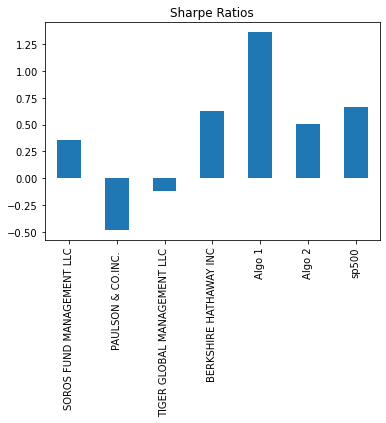

In [68]:
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

Algo 1 outperformed the whales and markets. Algo 2 fell below Bershire and sp50o but outperformed Tiger and Paulson. 
